In [1]:
%matplotlib inline

# Initial Data Cleaning and Exploration

# Directory & Packages

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
#import pysentiment
#from textstat.textstat import textstat 
from wordcloud import WordCloud
import nltk
from bs4 import BeautifulSoup

The default directory is the code subdirectory. Changing to the main repo directory above.

In [3]:
#retval=os.chdir("..")

# Helper Functions

In [4]:
def pd_tab(df,col,sort_by='count',asc=False):
    tab=df[col].value_counts(dropna=False).reset_index(name='count')
    tab.columns=[col,'count']
    tab['percent']=tab['count']/tab['count'].sum()
    tab.sort_values(by=sort_by,inplace=True,ascending=asc)
    return tab

# Upload Data

In [5]:
raw_data=pd.read_csv("Reviews.csv")
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Inspecting the Raw Features

In [6]:
raw_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
len(raw_data)

568454

**Data Key**  

* **product/productId:** asin, e.g. amazon.com/dp/B001E4KFG0  
* **review/userId:** id of the user, e.g. A3SGXH7AUHU8GW  
* **review/profileName:** name of the user  
* **review/helpfulness:** fraction of users who found the review helpful  
* **review/score:** rating of the product  
* **review/time:** time of the review (unix time)  
* **review/summary:** review summary  
* **review/text:** text of the review  

##### ID

In [8]:
raw_data.Id.is_unique

True

##### Product ID

In [9]:
len(raw_data.ProductId.unique())

74258

In [10]:
len(raw_data.ProductId.unique())/len(raw_data)

0.13063150228514533

In [11]:
pd_tab(raw_data,'ProductId').head(10)

,ProductId,count,percent
0,B007JFMH8M,913,0.001606
2,B002QWP8H0,632,0.001112
3,B002QWP89S,632,0.001112
4,B002QWHJOU,632,0.001112
1,B0026RQTGE,632,0.001112
5,B003B3OOPA,623,0.001096
6,B001EO5Q64,567,0.000997
12,B0026KPDG8,564,0.000992
15,B0026KNQSA,564,0.000992
14,B0013NUGDE,564,0.000992


In [12]:
pd_tab(raw_data,'ProductId').tail(10)

,ProductId,count,percent
53986,B000MS6JAK,1,0.000002
53985,B0001M0ZUW,1,0.000002
53984,B006RYAY68,1,0.000002
53983,B005IW3QW4,1,0.000002
53982,B006R098DW,1,0.000002
53981,B001SB1T1E,1,0.000002
53980,B004A8SC6M,1,0.000002
53979,B004W153AU,1,0.000002
53978,B0044WTHT0,1,0.000002
74257,B000084EK7,1,0.000002


##### UserID

In [13]:
len(raw_data.UserId.unique())

256059

In [14]:
len(raw_data.UserId.unique())/len(raw_data)

0.450448057362601

In [15]:
pd_tab(raw_data,'UserId').head(10)

,UserId,count,percent
0,A3OXHLG6DIBRW8,448,0.000788
1,A1YUL9PCJR3JTY,421,0.000741
2,AY12DBB0U420B,389,0.000684
3,A281NPSIMI1C2R,365,0.000642
4,A1Z54EM24Y40LL,256,0.000450
5,A1TMAVN4CEM8U8,204,0.000359
6,A2MUGFV2TDQ47K,201,0.000354
7,A3TVZM3ZIXG8YW,199,0.000350
8,A3PJZ8TU8FDQ1K,178,0.000313
9,AQQLWCMRNDFGI,176,0.000310


In [16]:
pd_tab(raw_data,'UserId').tail(10)

,UserId,count,percent
139127,A192WQB2YK23I5,1,0.000002
139128,AZ5JD0LW0K4G1,1,0.000002
139129,A5DOGIQ2NKETJ,1,0.000002
139130,A2W41T4WKH834A,1,0.000002
139131,AQZ80HTPQZR8Q,1,0.000002
139132,ANHTXFXQSI9NX,1,0.000002
139133,AV7AV1RRADYCS,1,0.000002
139134,A1L7P53X93S56J,1,0.000002
139135,A9G2MF9OUX3VG,1,0.000002
256058,A1Y4C9GXT6L7G8,1,0.000002


##### Profile Name

ignoring

##### Helpfulness Numerator

In [17]:
raw_data.HelpfulnessNumerator.isnull().sum()

0

In [18]:
np.sum(raw_data.HelpfulnessNumerator==0)

303826

In [ ]:
np.sum(raw_data.HelpfulnessNumerator==0)/len(raw_data)

0.5344777237911951

At least 53% are not helpful

In [ ]:
raw_data.HelpfulnessNumerator.describe()

count    568454.000000
mean          1.743817
std           7.636513
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

Text(0.5, 0, 'Counts')

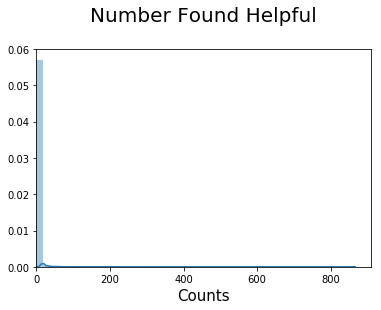

In [ ]:
g=sns.distplot(raw_data.HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

Very skewed

Text(0.5, 0, 'Counts')

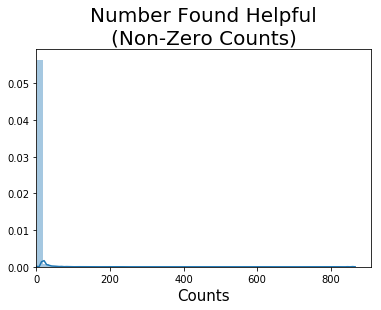

In [ ]:
g=sns.distplot(raw_data[raw_data.HelpfulnessNumerator>0].HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n(Non-Zero Counts)',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

Text(0.5, 0, 'Counts')

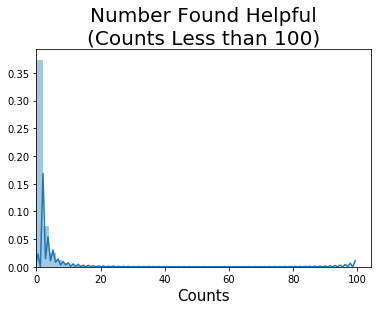

In [ ]:
g=sns.distplot(raw_data[raw_data.HelpfulnessNumerator<100].HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n(Counts Less than 100)',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

##### Helpfulness Denominator

In [ ]:
raw_data.HelpfulnessDenominator.isnull().sum()

0

In [ ]:
np.sum(raw_data.HelpfulnessDenominator==0)

270052

In [ ]:
np.sum(raw_data.HelpfulnessDenominator==0)/len(raw_data)

0.4750639453676111

In [ ]:
raw_data.HelpfulnessDenominator.describe()

count    568454.00000
mean          2.22881
std           8.28974
min           0.00000
25%           0.00000
50%           1.00000
75%           2.00000
max         923.00000
Name: HelpfulnessDenominator, dtype: float64

In [ ]:
raw_data[raw_data.HelpfulnessDenominator>100].HelpfulnessDenominator.describe()

count    423.000000
mean     204.886525
std      131.705928
min      101.000000
25%      120.000000
50%      152.000000
75%      235.000000
max      923.000000
Name: HelpfulnessDenominator, dtype: float64

Text(0.5, 0, 'Counts')

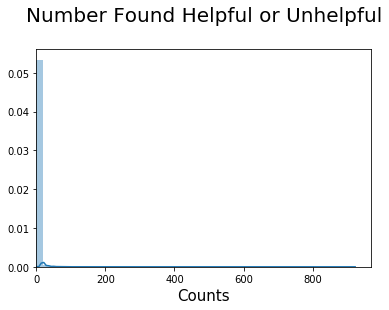

In [ ]:
g=sns.distplot(raw_data.HelpfulnessDenominator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful or Unhelpful\n',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

##### Helpfulness Numerator/Denominator

In [ ]:
len(raw_data[raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator])

2

In [ ]:
raw_data[raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [ ]:
raw_data=raw_data.loc[(raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator)==False]

In [ ]:
raw_data['Unhelpful']=raw_data.HelpfulnessDenominator-raw_data.HelpfulnessNumerator

Text(0, 0.5, 'No. Found Unhelpful')

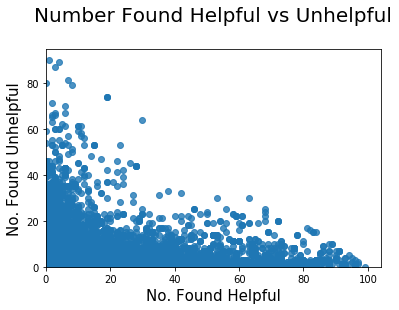

In [ ]:
g=sns.regplot(x="HelpfulnessNumerator", y="Unhelpful", data=raw_data[raw_data.HelpfulnessDenominator<100],
             fit_reg=False)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful vs Unhelpful\n',fontsize=20)
g.set_xlabel('No. Found Helpful',fontsize=15)
g.set_ylabel('No. Found Unhelpful',fontsize=15)

In [ ]:
raw_data['ppt_helpful']=raw_data.HelpfulnessNumerator/raw_data.HelpfulnessDenominator
raw_data.ix[raw_data.HelpfulnessDenominator==0,'ppt_helpful']=0

/Users/aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 0, 'Percent')

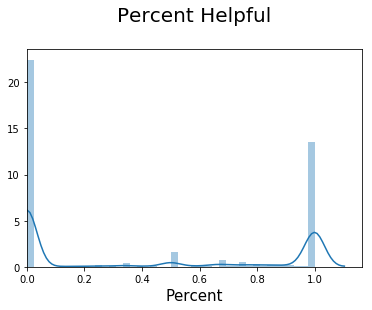

In [ ]:
g=sns.distplot(raw_data.ppt_helpful)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Percent Helpful\n',fontsize=20)
g.set_xlabel('Percent',fontsize=15)

In [ ]:
probs=list(np.linspace(start=0,stop=1,num=20))

In [ ]:
raw_data.ppt_helpful.describe(percentiles=probs)

count    568452.000000
mean          0.407855
std           0.462054
min           0.000000
0%            0.000000
5.3%          0.000000
10.5%         0.000000
15.8%         0.000000
21.1%         0.000000
26.3%         0.000000
31.6%         0.000000
36.8%         0.000000
42.1%         0.000000
47.4%         0.000000
50%           0.000000
52.6%         0.000000
57.9%         0.500000
63.2%         0.727273
68.4%         1.000000
73.7%         1.000000
78.9%         1.000000
84.2%         1.000000
89.5%         1.000000
94.7%         1.000000
100%          1.000000
max           1.000000
Name: ppt_helpful, dtype: float64

In [ ]:
probs=list(np.linspace(start=0,stop=1,num=20))
for p in probs:
    ppt=np.sum(raw_data.ppt_helpful<p)/len(raw_data)
    print('Less than {}% Helpful: {}%'.format(round(p*100,2), round(ppt*100,2)))

Less than 0.0% Helpful: 0.0%
Less than 5.26% Helpful: 53.48%
Less than 10.53% Helpful: 53.6%
Less than 15.79% Helpful: 53.81%
Less than 21.05% Helpful: 54.18%
Less than 26.32% Helpful: 54.62%
Less than 31.58% Helpful: 54.78%
Less than 36.84% Helpful: 55.77%
Less than 42.11% Helpful: 56.12%
Less than 47.37% Helpful: 56.31%
Less than 52.63% Helpful: 60.13%
Less than 57.89% Helpful: 60.37%
Less than 63.16% Helpful: 60.88%
Less than 68.42% Helpful: 62.8%
Less than 73.68% Helpful: 63.19%
Less than 78.95% Helpful: 64.51%
Less than 84.21% Helpful: 65.77%
Less than 89.47% Helpful: 66.64%
Less than 94.74% Helpful: 67.42%
Less than 100.0% Helpful: 67.75%


In [ ]:
for p in probs:
    ppt=np.sum(raw_data.ppt_helpful>=p)/len(raw_data)
    print('At Least {}% Helpful: {}%'.format(round(p*100,2), round(ppt*100,2)))

At Least 0.0% Helpful: 100.0%
At Least 5.26% Helpful: 46.52%
At Least 10.53% Helpful: 46.4%
At Least 15.79% Helpful: 46.19%
At Least 21.05% Helpful: 45.82%
At Least 26.32% Helpful: 45.38%
At Least 31.58% Helpful: 45.22%
At Least 36.84% Helpful: 44.23%
At Least 42.11% Helpful: 43.88%
At Least 47.37% Helpful: 43.69%
At Least 52.63% Helpful: 39.87%
At Least 57.89% Helpful: 39.63%
At Least 63.16% Helpful: 39.12%
At Least 68.42% Helpful: 37.2%
At Least 73.68% Helpful: 36.81%
At Least 78.95% Helpful: 35.49%
At Least 84.21% Helpful: 34.23%
At Least 89.47% Helpful: 33.36%
At Least 94.74% Helpful: 32.58%
At Least 100.0% Helpful: 32.25%


In [ ]:
np.sum((raw_data.ppt_helpful>=0.5) & (raw_data.ppt_helpful<=.8))/len(raw_data)

0.08855101222266788

In [ ]:
np.sum((raw_data.ppt_helpful>=0.7) & (raw_data.ppt_helpful<=.8))/len(raw_data)

0.023317711961608017

In [ ]:
np.sum((raw_data.ppt_helpful>=0.8) & (raw_data.ppt_helpful<=.9))/len(raw_data)

0.022733669685391204

In [ ]:
np.sum((raw_data.ppt_helpful>=0.7) & (raw_data.ppt_helpful<=.9))/len(raw_data)

0.03953016261707233

In [ ]:
np.sum((raw_data.ppt_helpful>=0.9) & (raw_data.ppt_helpful<=1))/len(raw_data)

0.33344064230577075

Will probably define helpful reviews as those +90%

Text(0, 0.5, 'Percent Found Helpful')

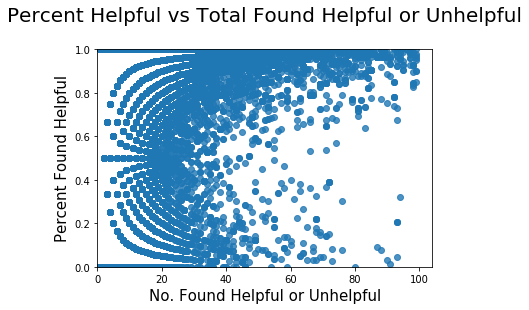

In [ ]:
g=sns.regplot(x="HelpfulnessDenominator", y="ppt_helpful", data=raw_data[raw_data.HelpfulnessDenominator<100],
             fit_reg=False)
g.axes.set_ylim(0,1)
g.axes.set_xlim(0,)
g.axes.set_title('Percent Helpful vs Total Found Helpful or Unhelpful\n',fontsize=20)
g.set_xlabel('No. Found Helpful or Unhelpful',fontsize=15)
g.set_ylabel('Percent Found Helpful',fontsize=15)

Interesting pattern. Difficult to understand what this means.

##### Product Rating

In [ ]:
raw_data.Score.isnull().sum()

0

In [ ]:
raw_data.Score.describe()

count    568452.000000
mean          4.183198
std           1.310438
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [ ]:
pd_tab(raw_data,'Score',sort_by='Score')

,Score,count,percent
0,5,363121,0.638789
1,4,80654,0.141884
3,3,42640,0.075011
4,2,29769,0.052369
2,1,52268,0.091948


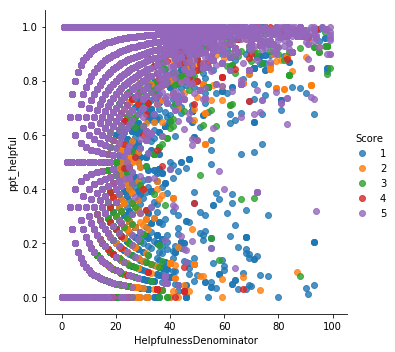

In [ ]:
g=sns.lmplot(x="HelpfulnessDenominator", y="ppt_helpful", data=raw_data[raw_data.HelpfulnessDenominator<100],
             hue='Score', fit_reg=False)

For this analysis I will assume that the helpfulness prediction will be made without the produce score

##### Time

In [ ]:
raw_data.Time.head()

0    1303862400
1    1346976000
2    1219017600
3    1307923200
4    1350777600
Name: Time, dtype: int64

In [ ]:
raw_data['date_time']=pd.to_datetime(raw_data['Time'],unit='s')
raw_data['date']=pd.to_datetime(raw_data['date_time'],unit='d')

In [ ]:
raw_data.date_time.describe()

count                  568452
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date_time, dtype: object

In [ ]:
raw_data.date.describe()

count                  568452
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date, dtype: object

Median Percent Helpful

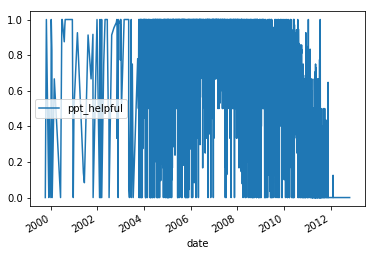

In [ ]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('median')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

Average Helpfulness

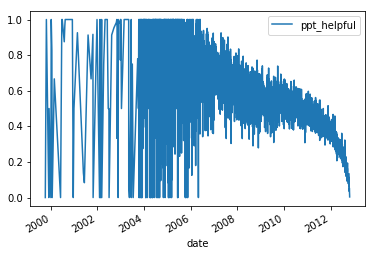

In [ ]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('mean')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

Count Reviews

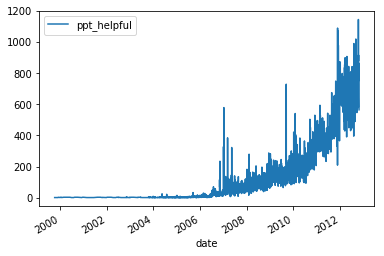

In [ ]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('count')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

In [ ]:
ts.head()

,ppt_helpful
date,
1999-10-08,1
1999-10-25,1
1999-12-02,1
1999-12-06,3
1999-12-06,3


In [ ]:
ts.tail()

,ppt_helpful
date,
2012-10-26,564
2012-10-26,564
2012-10-26,564
2012-10-26,564
2012-10-26,564


In [ ]:
len(raw_data[raw_data.date>=pd.to_datetime('2010-01-01')])

447842

In [ ]:
len(raw_data[raw_data.date>=pd.to_datetime('2012-01-01')])

198659

In [ ]:
raw_data['year']=raw_data.date.dt.year

In [ ]:
pd_tab(raw_data,'year',sort_by='year')

,year,count,percent
0,2012,198659,0.349474
1,2011,163299,0.287270
2,2010,85884,0.151084
3,2009,55326,0.097327
4,2008,34161,0.060095
5,2007,22300,0.039229
6,2006,6671,0.011735
7,2005,1335,0.002348
8,2004,561,0.000987
9,2003,132,0.000232


In [ ]:
tab=raw_data.groupby(['year']).ppt_helpful.mean().reset_index().sort_values(by='year')

In [ ]:
tab

,year,ppt_helpful
0,1999,0.416667
1,2000,0.649432
2,2001,0.600230
3,2002,0.580093
4,2003,0.667129
5,2004,0.693606
6,2005,0.716568
7,2006,0.701132
8,2007,0.649950
9,2008,0.560758


The helpfulness scores are definitely non-stationary across years. I will just use the data from 2012. 

# Building Model Training Data

### Limiting Sample

In [ ]:
raw_data_2=raw_data[(raw_data.year==2012)].copy()

### Defining Predictor

In [ ]:
raw_data_2['helpful']=(raw_data_2.ppt_helpful>=0.9).astype(float)

In [ ]:
pd_tab(raw_data_2,'helpful')

,helpful,count,percent
0,0.0,155170,0.781087
1,1.0,43489,0.218913


In [ ]:
del raw_data

### Minor Prelim Text Cleaning

In [ ]:
raw_data_2['Text'] = raw_data_2['Text'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

### New Features

In [ ]:
nlp=spacy.load('en')

In [ ]:
raw_data_2['doc_id']=(np.linspace(start=1,stop=len(raw_data_2),num=len(raw_data_2))-1)
raw_data_2['doc_id'].head()

1    0.0
4    1.0
5    2.0
6    3.0
7    4.0
Name: doc_id, dtype: float64

In [ ]:
parse_doc_list=[]
parse_doc_list_id=[]
i=0
for doc in nlp.pipe(raw_data_2.Text.astype(str),batch_size=10000,n_threads=4):
    parse_doc_list.append(doc)
    parse_doc_list_id.append(i)
    i=i+1

In [ ]:
raw_data_2['parsed_text'] = parse_doc_list

In [ ]:
type(parse_doc_list[0])

##### Document Vector

In [ ]:
doc_vecs = np.row_stack([doc.vector for doc in parse_doc_list])
doc_vecs = np.column_stack((doc_vecs,parse_doc_list_id))

In [ ]:
doc_vecs.shape

In [ ]:
len(raw_data_2)

In [ ]:
doc_vecs=pd.DataFrame(doc_vecs)

In [ ]:
cols=['vec'+str(s) for s in doc_vecs.columns]
cols[-1]='doc_id'

In [ ]:
doc_vecs.columns=cols

In [ ]:
doc_vecs.to_pickle('./clean_data/doc_vecs.pkl')

In [ ]:
raw_data_2=pd.merge(raw_data_2,doc_vecs,how='left',on=['doc_id'])

##### Word and Sentence Count

In [ ]:
def sent_count(X):
    return len([x for x in X.sents])

def word_count(X):
    return len(X)

In [ ]:
raw_data_2['num_sents'] = raw_data_2['parsed_text'].apply(sent_count)

In [ ]:
raw_data_2['num_words'] = raw_data_2['parsed_text'].apply(word_count)

##### Readability

In [ ]:
raw_data_2['readability'] = raw_data_2['Text'].apply(textstat.automated_readability_index)

##### Sentiment

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()

In [ ]:
raw_data_2['sentiment_dict'] = raw_data_2['Text'].apply(sent_analyzer.polarity_scores)

In [ ]:
raw_data_2['neg_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['neg'])

In [ ]:
raw_data_2['pos_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['pos'])

In [ ]:
raw_data_2['neu_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['neu'])

In [ ]:
raw_data_2['comp_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['compound'])

##### Word Count Type Features

In [ ]:
def return_lemma_text(text):
    '''
    Return space separated lemmas, excluding spaces, urls, #s, emails, stop words, and proper nouns
    '''
    return ' '.join([t.lemma_.lower() for t in text if (t.is_punct==False) &
                                                (t.is_space==False) &
                                                (t.like_url==False) &
                                                (t.like_num==False) &
                                                (t.like_email==False) &
                                                (t.is_stop==False) &
                                                (t.pos_!='PROPN')])

In [ ]:
raw_data_2['text_lemma'] = raw_data_2['parsed_text'].apply(return_lemma_text)

In [ ]:
raw_data_2['Text'].head()

In [ ]:
raw_data_2['text_lemma'].head()

In [ ]:
del raw_data_2['parsed_text']

In [ ]:
raw_data_2.to_pickle('./clean_data/raw_data_post_parse.pkl')

### The Obligatory NLP Word Clouds

All Reviews

In [ ]:
text=' '.join(raw_data_2.text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/all_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Helpful Reviews

In [ ]:
text=' '.join(raw_data_2[raw_data_2.helpful==1].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/helpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Unhelpful Reviews

In [ ]:
text=' '.join(raw_data_2[raw_data_2.helpful==0].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/unhelpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()